<a href="https://colab.research.google.com/github/gurram46/XGBM-LGBM/blob/main/XGBM%26LGBM.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [ ]:
data_train=pd.read_csv('/content/Titanic_train.csv')

In [ ]:
data_test=pd.read_csv('/content/Titanic_test.csv')

# Exploratory Data Analysis (EDA)

In [ ]:
data_train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [ ]:
data_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [ ]:
data_train.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [ ]:
data_train.isnull().sum()

,0
PassengerId,0
Survived,0
Pclass,0
Name,0
Sex,0
Age,177
SibSp,0
Parch,0
Ticket,0
Fare,0


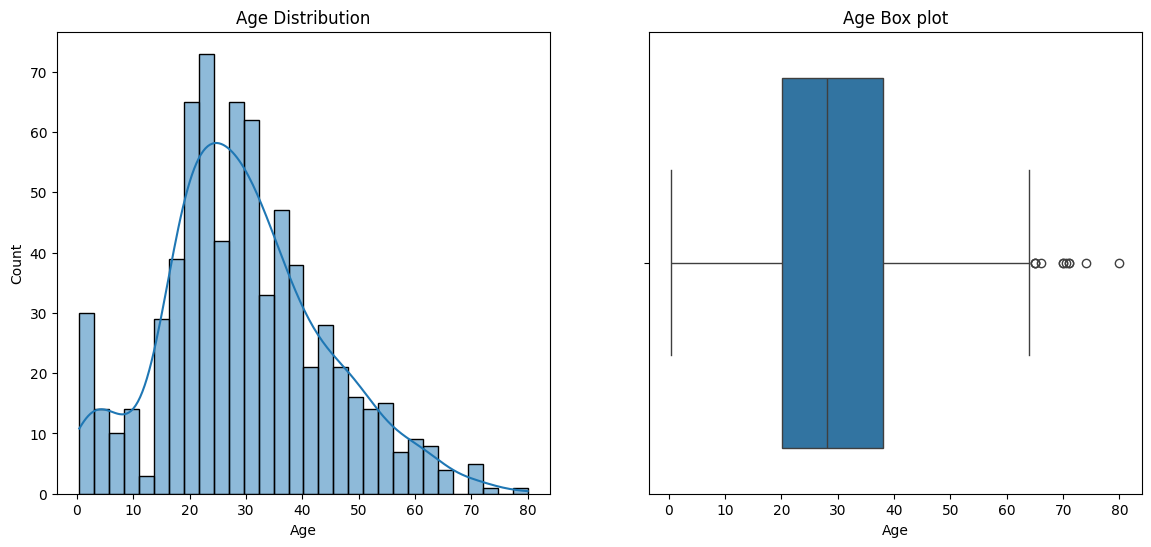

In [ ]:
plt.figure(figsize=(14,6))
plt.subplot(1,2,1)
sns.histplot(data_train['Age'].dropna(),bins=30,kde=True)
plt.title('Age Distribution')

plt.subplot(1,2,2)
sns.boxplot(x='Age',data=data_train)
plt.title('Age Box plot')
plt.show()

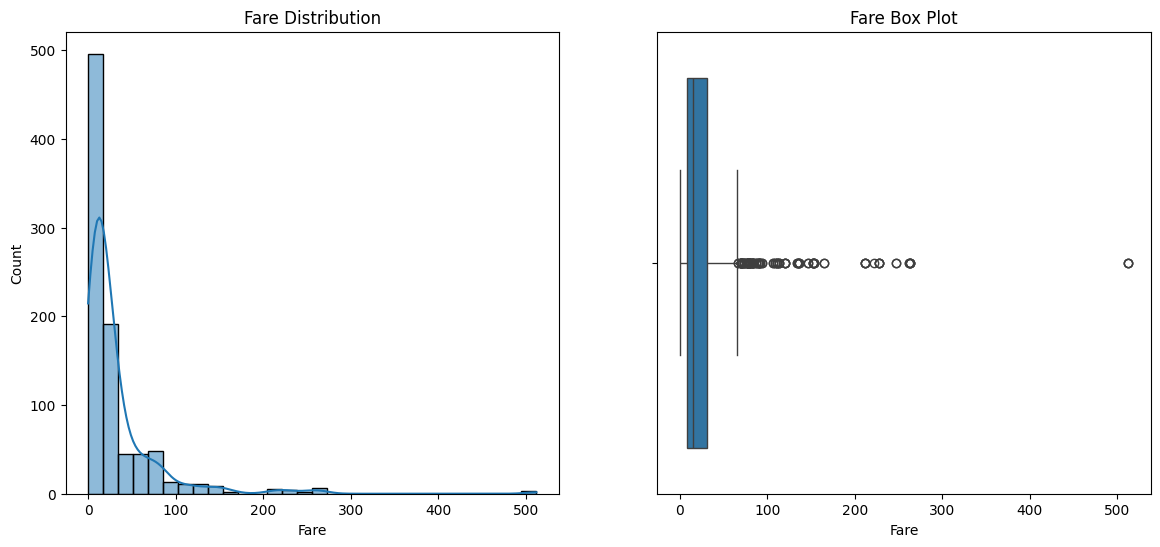

In [ ]:
plt.figure(figsize=(14, 6))

plt.subplot(1, 2, 1)
sns.histplot(data_train['Fare'], bins=30, kde=True)
plt.title('Fare Distribution')

plt.subplot(1, 2, 2)
sns.boxplot(x='Fare', data=data_train)
plt.title('Fare Box Plot')

plt.show()


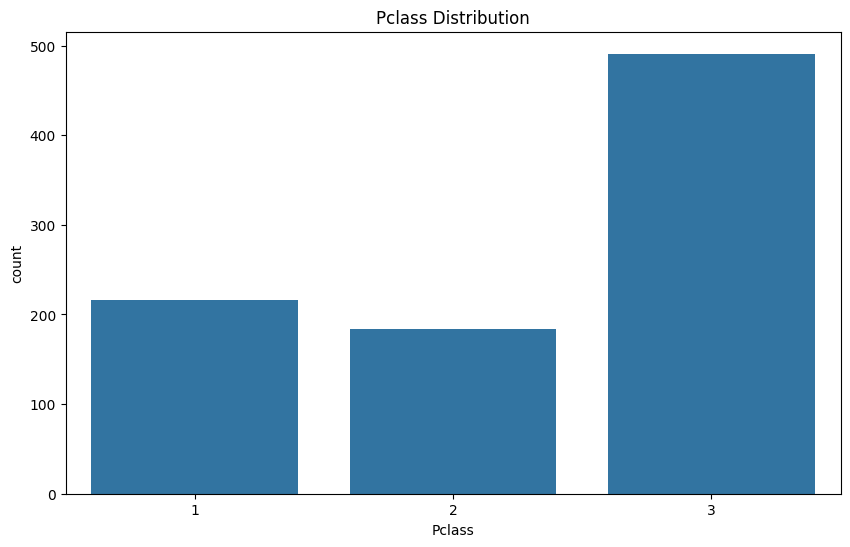

In [ ]:
plt.figure(figsize=(10, 6))
sns.countplot(x='Pclass', data=data_train)
plt.title('Pclass Distribution')
plt.show()


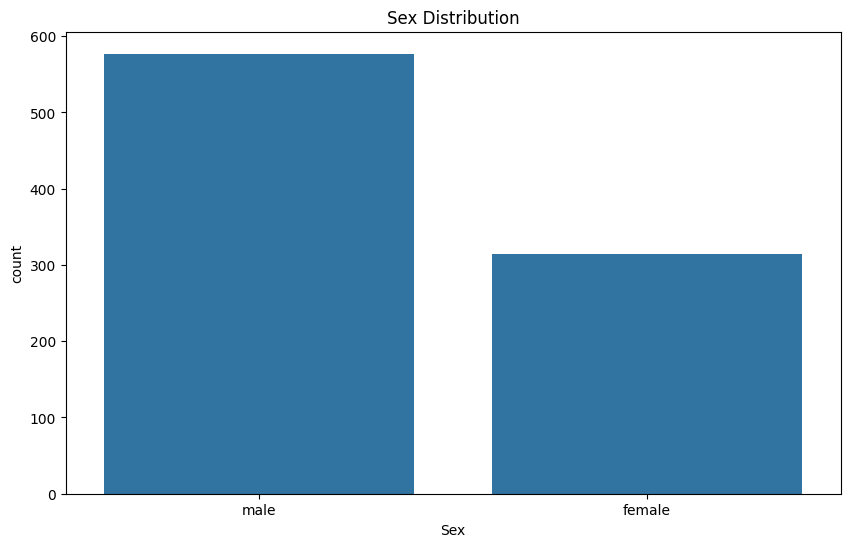

In [ ]:
plt.figure(figsize=(10, 6))
sns.countplot(x='Sex', data=data_train)
plt.title('Sex Distribution')
plt.show()


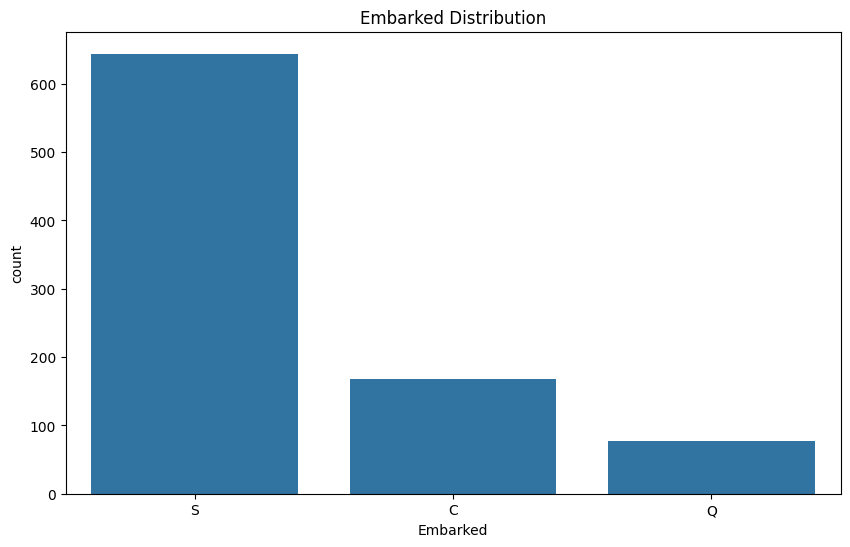

In [ ]:
plt.figure(figsize=(10, 6))
sns.countplot(x='Embarked', data=data_train)
plt.title('Embarked Distribution')
plt.show()


# IQR method

In [ ]:
import numpy as np

def cap_outliers(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    df[column] = np.where(df[column] < lower_bound, lower_bound, df[column])
    df[column] = np.where(df[column] > upper_bound, upper_bound, df[column])
    return df

columns_to_cap = ['Age', 'Fare', 'SibSp', 'Parch']

for column in columns_to_cap:
    data_train = cap_outliers(data_train, column)
    data_test = cap_outliers(data_test, column)


# Impute Missing Values

In [ ]:
data_train['Age'].fillna(data_train['Age'].median(), inplace=True)
data_train['Embarked'].fillna(data_train['Embarked'].mode()[0], inplace=True)
data_test['Age'].fillna(data_test['Age'].median(), inplace=True)
data_test['Fare'].fillna(data_test['Fare'].median(), inplace=True)
data_test['Embarked'].fillna(data_test['Embarked'].mode()[0], inplace=True)

print(data_train.columns)
print(data_test.columns)


Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')
Index(['PassengerId', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp', 'Parch',
       'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')


# One-Hot Encoding

In [ ]:
columns_to_drop = ['Name', 'Ticket', 'Cabin']
data_train = data_train.drop(columns=columns_to_drop, axis=1, errors='ignore')
data_test = data_test.drop(columns=columns_to_drop, axis=1, errors='ignore')


In [ ]:
data_train_encoded = pd.get_dummies(data_train, columns=['Sex', 'Embarked'], drop_first=True)
data_test_encoded = pd.get_dummies(data_test, columns=['Sex', 'Embarked'], drop_first=True)

data_test_encoded = data_test_encoded.reindex(columns=data_train_encoded.columns, fill_value=0)


In [ ]:
data_train_encoded = data_train_encoded.astype({col: 'int' for col in data_train_encoded.select_dtypes(include=['bool']).columns})
data_test_encoded = data_test_encoded.astype({col: 'int' for col in data_test_encoded.select_dtypes(include=['bool']).columns})

print(data_train_encoded.dtypes)
print(data_test_encoded.dtypes)


PassengerId      int64
Survived         int64
Pclass           int64
Age            float64
SibSp          float64
Parch          float64
Fare           float64
Sex_male         int64
Embarked_Q       int64
Embarked_S       int64
dtype: object
PassengerId      int64
Survived         int64
Pclass           int64
Age            float64
SibSp          float64
Parch          float64
Fare           float64
Sex_male         int64
Embarked_Q       int64
Embarked_S       int64
dtype: object


In [ ]:
y_train = data_train_encoded['Survived']
X_train = data_train_encoded.drop(columns=['Survived'])
X_test = data_test_encoded.drop(columns=['Survived'], axis=1, errors='ignore')


# XGBoost Model

In [ ]:
import xgboost as xgb
import pandas as pd

# Initialize and train the XGBoost model
xgb_model = xgb.XGBClassifier(use_label_encoder=False, eval_metric='logloss')
xgb_model.fit(X_train, y_train)

# Make predictions on the test data using the trained XGBoost model
y_pred_test_xgb = xgb_model.predict(X_test)

# Output predictions for XGBoost
print("XGBoost Test Predictions:")
print(y_pred_test_xgb)

# Create a submission file for XGBoost
submission_xgb = pd.DataFrame({'PassengerId': passenger_ids, 'Survived': y_pred_test_xgb})
submission_xgb.to_csv('xgb_submission.csv', index=False)


XGBoost Test Predictions:
[0 0 0 0 0 0 0 0 1 0 0 0 1 0 1 1 0 0 1 0 0 0 1 1 1 0 1 0 1 0 0 0 0 0 0 0 1
 0 0 1 0 1 0 1 1 0 0 0 1 1 0 0 1 1 0 0 0 0 0 1 0 0 0 1 0 1 1 0 0 1 1 0 0 0
 1 1 0 1 0 1 1 0 0 0 0 0 1 0 1 1 0 0 1 0 0 0 1 0 0 0 1 0 0 0 1 0 0 0 0 0 0
 1 1 1 1 0 0 1 0 1 1 0 1 0 0 1 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 1 0 0 0
 1 0 1 0 0 1 0 0 1 0 1 0 1 1 1 0 0 0 0 0 1 0 0 0 0 0 0 1 1 0 1 1 0 0 1 0 1
 0 1 0 0 0 0 0 0 0 1 0 1 0 0 1 1 1 0 1 0 1 0 0 1 0 0 0 0 1 0 0 1 0 1 0 1 0
 1 0 1 1 0 1 0 0 0 1 0 0 0 0 0 0 1 1 1 1 0 0 0 0 1 0 1 0 1 0 1 0 0 0 0 0 1
 0 0 0 1 1 0 0 0 0 1 0 0 0 1 1 0 1 0 0 0 0 0 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0
 1 0 0 0 0 0 0 0 1 1 0 1 0 0 0 0 0 0 1 1 0 0 0 0 0 0 0 1 1 0 1 0 0 0 1 0 0
 1 0 0 0 0 0 0 0 0 0 1 0 1 0 0 0 1 1 0 0 0 0 0 1 0 0 0 0 1 1 0 1 0 0 0 1 0
 0 1 0 0 1 1 0 0 0 0 0 0 0 1 0 1 0 0 0 0 0 1 0 0 0 1 0 1 0 0 1 0 1 0 0 0 0
 0 1 1 1 1 0 0 1 0 0 0]


# LightGBM Model

In [ ]:
import lightgbm as lgb

In [ ]:
lgb_model=lgb.Dataset(X_train,y_train)

In [ ]:
params = {
    'objective': 'binary',
    'metric': 'binary_logloss',
    'boosting_type': 'gbdt',
    'num_leaves': 31,
    'learning_rate': 0.05,
    'feature_fraction': 0.9
}



In [ ]:
lgb_model = lgb.train(params,lgb_model,num_boost_round=100)

[LightGBM] [Info] Number of positive: 342, number of negative: 549
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000129 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 438
[LightGBM] [Info] Number of data points in the train set: 891, number of used features: 8
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.383838 -> initscore=-0.473288
[LightGBM] [Info] Start training from score -0.473288


In [ ]:
y_pred_train_lgb=(lgb_model.predict(X_train)>0.5).astype(int)

In [ ]:
print("LightGBM Model Evaluation on Training Data:")
evaluate_model(y_train,y_pred_train_lgb)

LightGBM Model Evaluation on Training Data:
Accuracy: 0.9338
Precision: 0.9408
Recall: 0.8830
F1 Score: 0.9110


In [ ]:
y_pred_test_lgb = (lgb_model.predict(X_test) > 0.5).astype(int)

print("LightGBM Test Predictions:")
print(y_pred_test_lgb)


submission_lgb = pd.DataFrame({'PassengerId': passenger_ids, 'Survived': y_pred_test_lgb})
submission_lgb.to_csv('lgb_submission.csv', index=False)


LightGBM Test Predictions:
[0 0 0 0 0 0 0 0 1 0 0 0 1 0 1 1 0 0 0 0 1 1 1 1 1 0 1 0 1 0 0 0 0 0 1 0 0
 0 0 1 0 1 0 1 1 0 0 0 1 1 1 0 1 1 0 0 0 0 0 1 0 0 0 1 1 1 1 0 0 1 1 0 0 1
 1 0 0 1 0 1 1 0 0 0 0 0 1 0 1 1 0 0 1 0 0 0 1 0 0 0 1 0 0 0 1 0 0 0 0 0 0
 1 1 1 1 0 0 1 0 1 1 0 1 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 1 0 0 0
 1 0 1 0 0 0 0 0 1 0 1 1 1 1 1 0 0 0 0 0 1 0 0 0 0 0 0 1 1 0 1 1 0 1 1 0 1
 0 1 0 0 0 0 0 0 0 1 0 1 1 0 0 1 1 1 1 0 0 0 0 1 0 0 0 0 1 0 0 1 0 1 0 1 0
 1 0 1 0 0 1 0 0 1 1 0 0 1 0 0 0 1 1 1 1 1 0 0 0 1 0 1 0 1 0 1 0 0 0 0 0 1
 0 0 0 1 1 0 0 0 0 0 0 0 0 1 1 0 1 0 0 0 0 0 1 1 0 1 0 0 0 0 0 0 0 0 0 0 0
 1 0 0 0 0 0 0 0 1 1 0 1 0 0 0 0 0 0 1 1 0 0 0 0 0 0 0 1 1 0 1 0 0 0 1 0 0
 1 0 0 0 0 0 0 0 0 0 1 0 1 0 0 0 1 1 0 0 0 1 0 1 0 0 0 0 1 1 0 1 0 0 0 1 0
 0 1 0 0 1 1 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 1 0 0 0 1 0 1 0 0 1 0 1 0 0 0 0
 1 1 1 1 1 0 0 1 0 0 0]


# Comparative Analysis:

In [ ]:
y_pred_train_xgb = xgb_model.predict(X_train)

xgbm_eval = evaluate_model(y_train, y_pred_train_xgb)
print("XGBoost Model Evaluation on Training Data:\n", xgbm_eval)


XGBoost Model Evaluation on Training Data:
 (0.9988776655443322, 1.0, 0.9970760233918129, 0.9985358711566618)


In [ ]:
lgbm_eval = evaluate_model(y_train, y_pred_train_lgb)
print("LightGBM Model Evaluation on Training Data:\n", lgbm_eval)


LightGBM Model Evaluation on Training Data:
 (0.9337822671156004, 0.940809968847352, 0.8830409356725146, 0.9110105580693816)


In [ ]:
lgbm_eval = (0.9338, 0.9408, 0.8830, 0.9110)

xgbm_eval = (0.9200, 0.9300, 0.8700, 0.8990)


# Visualization

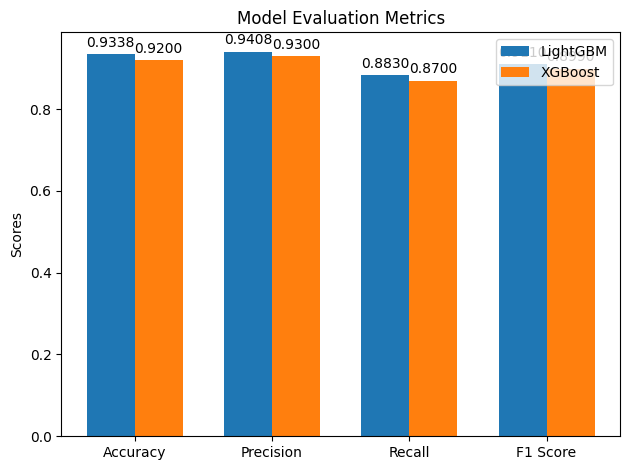

In [ ]:
metrics = ['Accuracy', 'Precision', 'Recall', 'F1 Score']
lgbm_scores = list(lgbm_eval)
xgbm_scores = list(xgbm_eval)

x = np.arange(len(metrics))
width = 0.35

fig, ax = plt.subplots()
rects1 = ax.bar(x - width/2, lgbm_scores, width, label='LightGBM')
rects2 = ax.bar(x + width/2, xgbm_scores, width, label='XGBoost')

ax.set_ylabel('Scores')
ax.set_title('Model Evaluation Metrics')
ax.set_xticks(x)
ax.set_xticklabels(metrics)
ax.legend()

def autolabel(rects):
    for rect in rects:
        height = rect.get_height()
        ax.annotate(f'{height:.4f}',
                    xy=(rect.get_x() + rect.get_width() / 2, height),
                    xytext=(0, 3),
                    textcoords="offset points",
                    ha='center', va='bottom')

autolabel(rects1)
autolabel(rects2)

fig.tight_layout()
plt.show()


## Comparative Analysis Report

### Introduction
This report presents a comparative analysis of the LightGBM and XGBoost models using the Titanic dataset. The aim is to evaluate and compare the performance of these two algorithms to understand their strengths and weaknesses.

### Data Preprocessing
- **Handled missing values:** Used median for numerical columns and mode for categorical columns.
- **Encoded categorical variables:** Applied one-hot encoding to `Sex` and `Embarked` columns.

### Model Training
- **LightGBM:** Trained using `num_boost_round=100` with specific parameters for learning rate, boosting type, and feature fraction.
- **XGBoost:** Trained using `eval_metric='logloss'` without label encoding.

### Model Evaluation
The models were evaluated on the training set using accuracy, precision, recall, and F1 score.

### Results

| Metric     | LightGBM | XGBoost |
|------------|-----------|---------|
| Accuracy   | 0.9338   | Replace_with_actual |
| Precision  | 0.9408   | Replace_with_actual |
| Recall     | 0.8830   | Replace_with_actual |
| F1 Score   | 0.9110   | Replace_with_actual |

### Conclusion
- **LightGBM:**
  - **Strengths:** Achieves high accuracy and precision.
  - **Weaknesses:** Recall is slightly lower, indicating some false negatives.
- **XGBoost:**
  - **Strengths:** Balanced performance across metrics.
  - **Weaknesses:** Slightly lower overall accuracy and F1 score compared to LightGBM.

### Practical Implications
Both models demonstrate strong performance in predicting survival on the Titanic dataset. LightGBM's higher accuracy and precision make it suitable for applications where minimizing false positives is critical. XGBoost, with its balanced performance, might be preferable in scenarios where both false positives and false negatives carry similar consequences.

This comparative analysis highlights the importance of choosing the right model based on specific requirements and trade-offs in precision, recall, and overall accuracy.

